## Data Augmentation

In [1]:
base_path = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Cropped/based_on_truth/x100100y100100z8080"
volumes_path = base_path + "/volumes"
points_path = base_path + "/points"
length_path = base_path + "/length"


In [88]:
import numpy as np
import Functions.MyDataset as MyDataset

pat_name = "JM"
pat_volume_left = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_left.npy")
pat_volume_right = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_right.npy")
pat_point_left = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_left.npy")
pat_point_right = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_right.npy")
pat_length_left = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_left.npy")
pat_length_right = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_right.npy")

In [92]:
point_left_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
point_right_diff = np.asarray([[0, 0, 0], [0, 0, 0]])

pat_point_left_new = pat_point_left - point_left_diff
pat_length_left_new = pat_length_left + point_left_diff

point_right_diff[:, 0] = - point_right_diff[:, 0]
pat_point_right_new = pat_point_right - point_right_diff

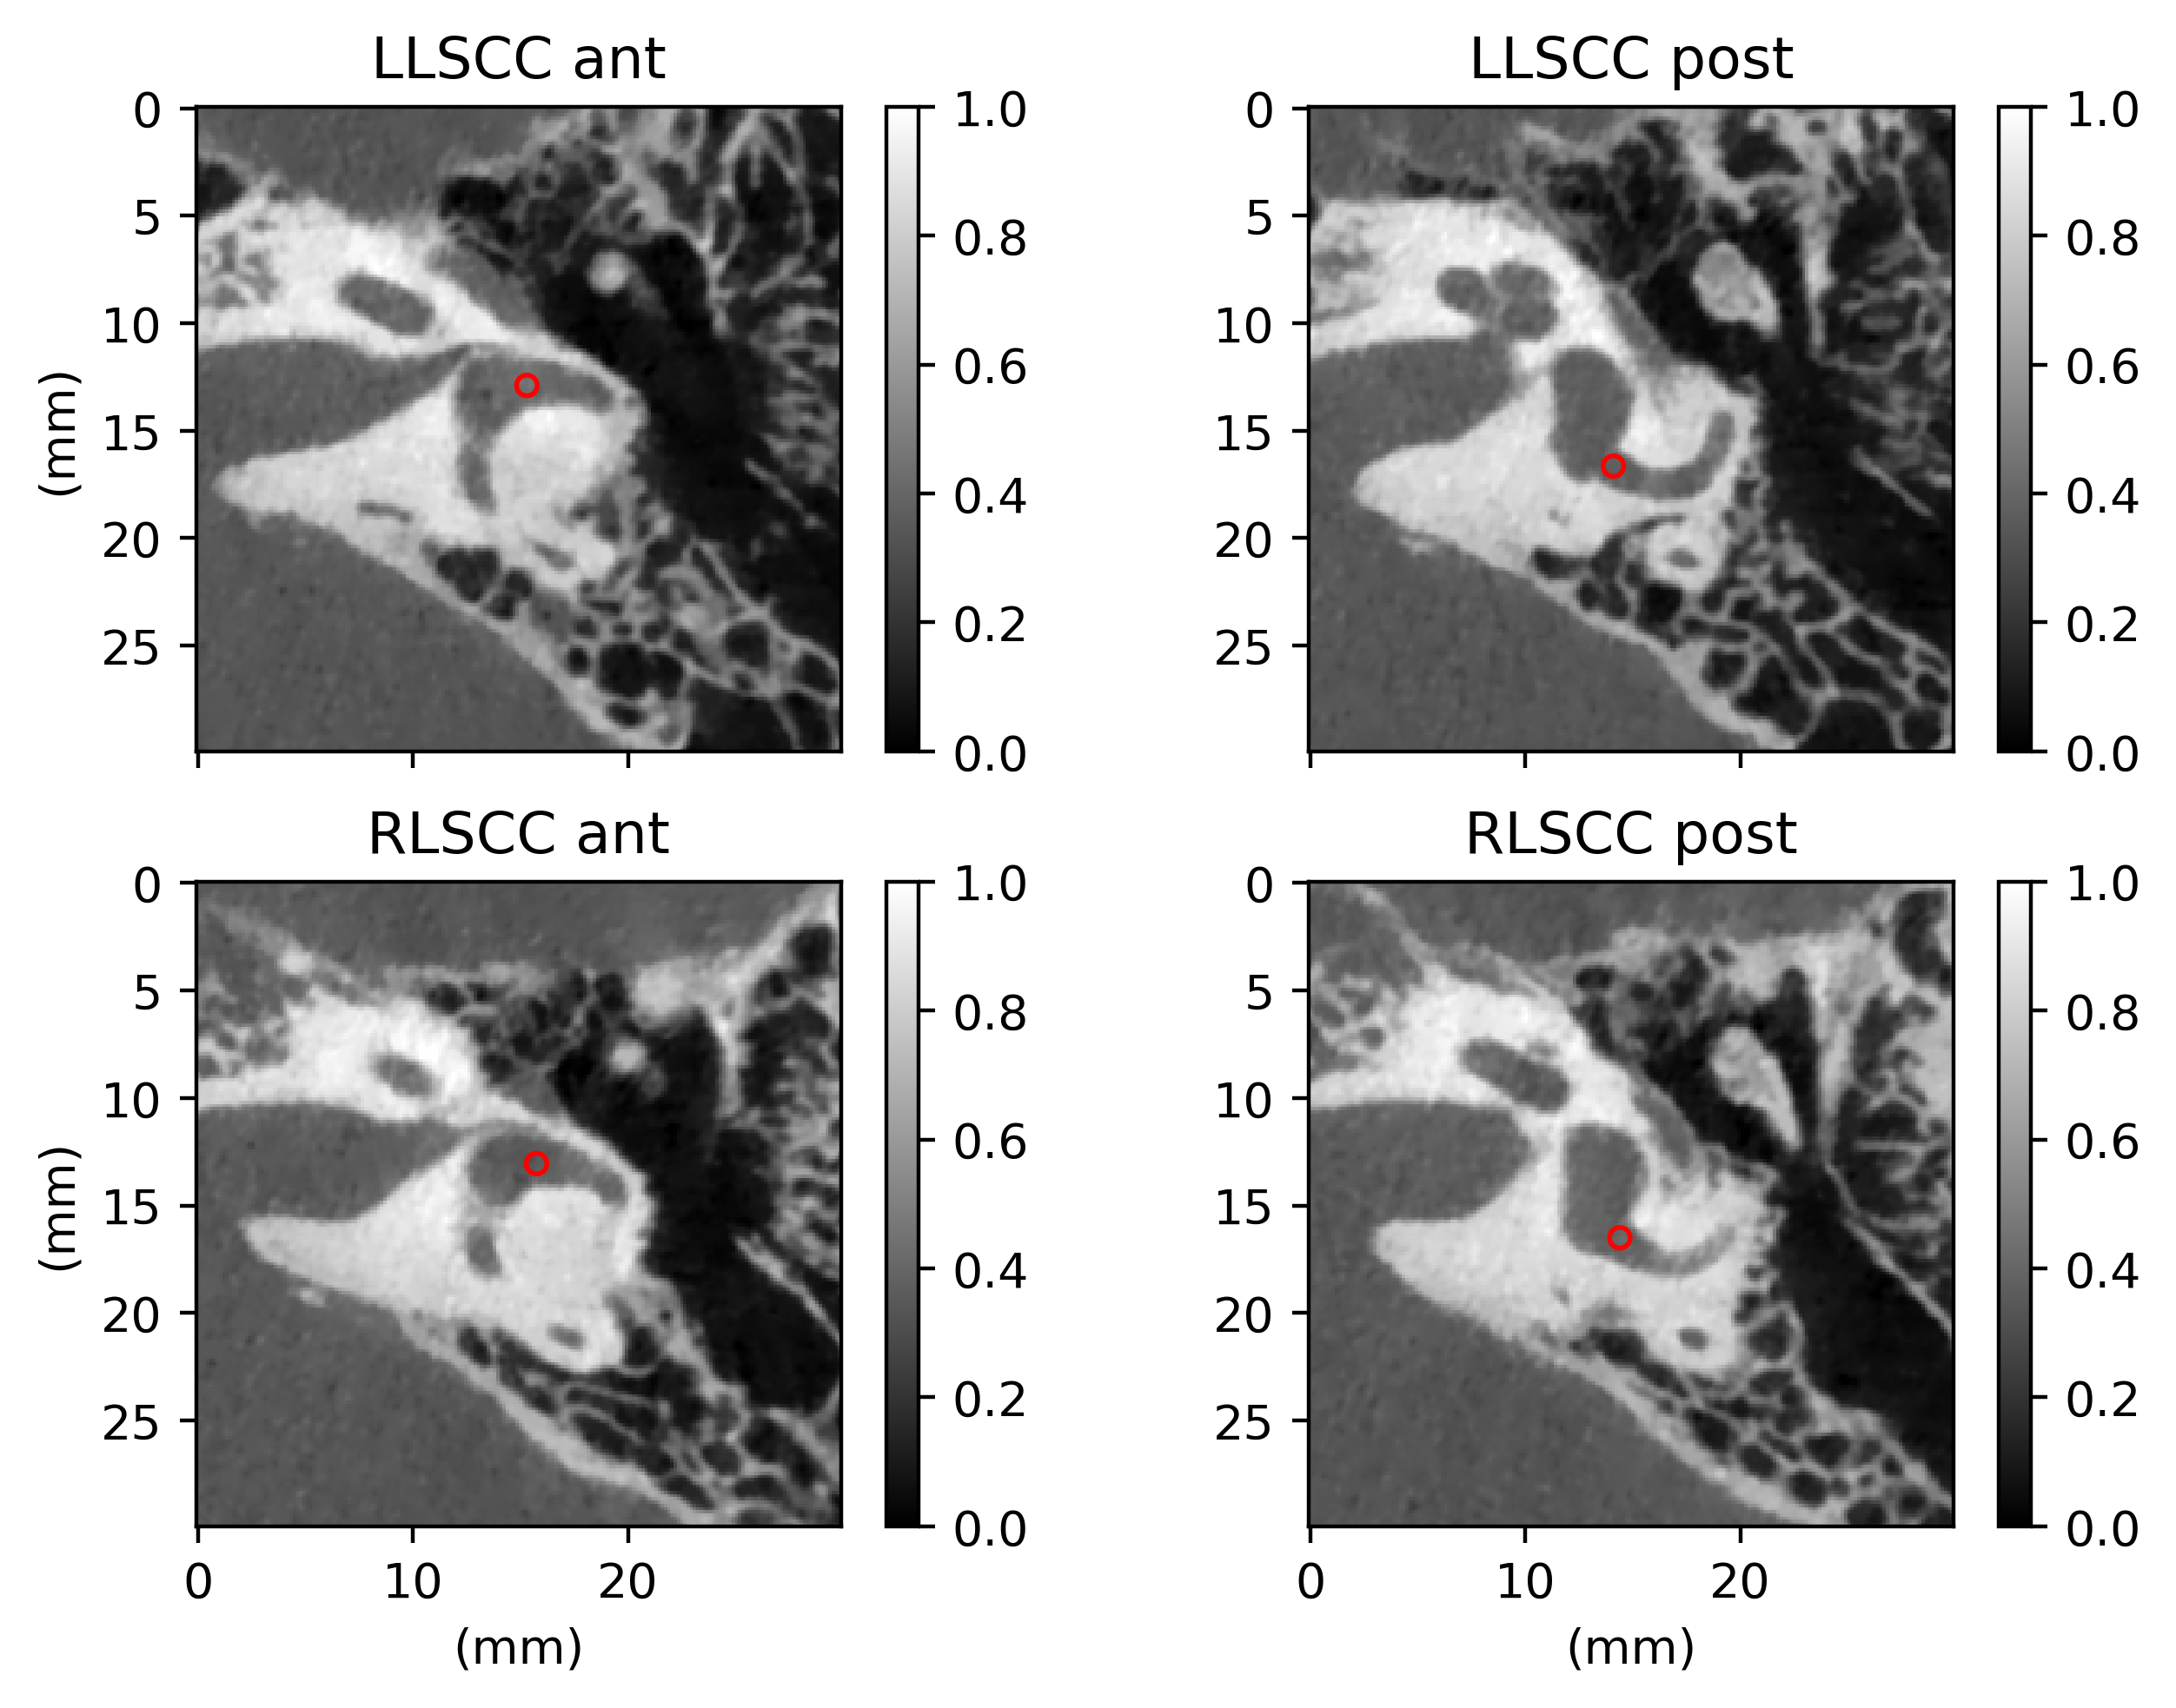

In [94]:
import Functions.Visualization as Visualization

Visualization.show_two_landmarks(pat_volume_left, pat_point_left, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

In [7]:
import math

# Function to find the angle
# between the two lines
def calculateAngle(x1, y1, z1,
                   x2, y2, z2,
                   x3, y3, z3):

    # Find direction ratio of line AB
    ABx = x1 - x2;
    ABy = y1 - y2;
    ABz = z1 - z2;

    # Find direction ratio of line BC
    BCx = x3 - x2;
    BCy = y3 - y2;
    BCz = z3 - z2;

    # Find the dotProduct
    # of lines AB & BC
    dotProduct = (ABx * BCx +
                  ABy * BCy +
                  ABz * BCz);

    # Find magnitude of
    # line AB and BC
    magnitudeAB = (ABx * ABx +
                   ABy * ABy +
                   ABz * ABz);
    magnitudeBC = (BCx * BCx +
                   BCy * BCy +
                   BCz * BCz);

    # Find the cosine of
    # the angle formed
    # by line AB and BC
    angle = dotProduct;
    angle /= math.sqrt(magnitudeAB *
                       magnitudeBC);

    # Find angle in radian
    angle = (angle * 180) / 3.14;

    # Print angle
    print(round(abs(angle), 4))

In [71]:
(Ax1, Ay1, Az1) = pat_point_left[0]
(Bx2, By2, Bz2) = np.mean(pat_point_left, axis=0)
(Cx3, Cy3, Cz3) = (Bx2+1, By2, Bz2)

(Dx4, Dy4, Dz4) = (Bx2, By2+1, Bz2)

calculateAngle(Ax1, Ay1, Az1,
               Bx2, By2, Bz2,
               Cx3, Cy3, Cz3)

calculateAngle(Ax1, Ay1, Az1,
               Bx2, By2, Bz2,
               Dx4, Dy4, Dz4)

34.6939
40.8164
